# PCA

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [3]:
df=pd.read_csv("clustering.csv") 
df.head() 

,height,length,width,std,min,max,kurtosis,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
df.shape


(210, 8)

In [5]:
df[200:]

,height,length,width,std,min,max,kurtosis,Class
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,2
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,2
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,2
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,2
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,2


In [12]:
from sklearn.preprocessing import StandardScaler
# ,'width','std','min','max','kurtosis'

feature = ['height','length']
x = df.loc[:,feature]
y = df.loc[:,'Class']
x = StandardScaler().fit_transform(x)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['Class']]],axis=1)

In [14]:
finaldf.head()

,pc1,pc2,Class
0,0.252833,0.051877,0
1,0.013726,-0.002096,0
2,-0.390512,-0.118889,0
3,-0.581542,-0.090681,0
4,0.548610,-0.081078,0


In [15]:
df['Class'].unique()

array([0, 1, 2], dtype=int64)

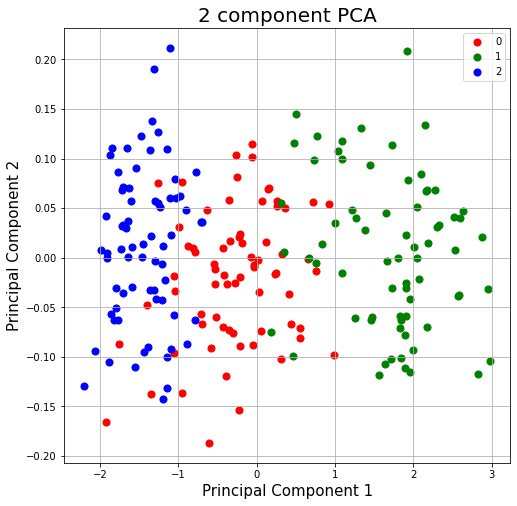

In [16]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Class'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [17]:
pca.explained_variance_ratio_

array([0.99717047, 0.00282953])